In [75]:
#Imports
import pandas as pd
import altair as alt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt

In [143]:
data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

testClean = data
testClean["job"] = testClean["job"].replace(['unknown'], "admin.")
testClean["marital"] = testClean["marital"].replace(['unknown'], "married")
testClean["education"] = testClean["education"].replace(['unknown'], "university.degree")
testClean["default"] = testClean["default"].replace(['unknown'], "no")
testClean["housing"] = testClean["housing"].replace(['unknown'], "yes")
testClean["loan"] = testClean["loan"].replace(['unknown'], "no")
testClean['poutcome'] = testClean['poutcome'].replace(['nonexistent'], "failure")
testClean['pdays'] = testClean['pdays'].apply(lambda x: np.nan if x == 999 else x)
testClean[['job','marital',"education",'default','housing','contact','month','day_of_week','poutcome','loan','y']] = testClean[['job','marital',"education",'default','housing','contact','month','day_of_week','poutcome','loan','y']].apply(lambda x: pd.factorize(x)[0])
testClean = testClean[~testClean['pdays'].isna()]
testClean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 21712 to 37060
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1373 non-null   int64  
 1   job             1373 non-null   int64  
 2   marital         1373 non-null   int64  
 3   education       1373 non-null   int64  
 4   default         1373 non-null   int64  
 5   housing         1373 non-null   int64  
 6   loan            1373 non-null   int64  
 7   contact         1373 non-null   int64  
 8   month           1373 non-null   int64  
 9   day_of_week     1373 non-null   int64  
 10  campaign        1373 non-null   int64  
 11  pdays           1373 non-null   float64
 12  previous        1373 non-null   int64  
 13  poutcome        1373 non-null   int64  
 14  emp.var.rate    1373 non-null   float64
 15  cons.price.idx  1373 non-null   float64
 16  cons.conf.idx   1373 non-null   float64
 17  euribor3m       1373 non-nul

In [164]:
data["y"].value_counts()
#sns.pairplot(testClean, hue="y")
#testClean.isnull().sum()

0    32861
1     4208
Name: y, dtype: int64

In [206]:
#Splitting the data
X = testClean.iloc[:,0:19]
y = testClean['y']

#Splitting the data into training, validation, and testing
X_main, X_test, y_main, y_test = train_test_split(X, y, test_size=0.15 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_main, y_main, test_size=0.15, random_state=42)

In [231]:
#see correlation with validation set and training set
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)


cons.conf.idx     0.078122
euribor3m         0.053473
cons.price.idx    0.047189
emp.var.rate      0.037768
marital           0.024863
nr.employed       0.023593
poutcome          0.021448
month             0.021200
campaign          0.018644
education         0.015808
pdays             0.015272
job               0.010433
default           0.009382
day_of_week       0.007664
housing           0.001742
contact           0.001429
previous          0.000000
loan              0.000000
age               0.000000
dtype: float64

In [232]:
sel_three_cols = SelectKBest(mutual_info_classif, k=3)
sel_three_cols.fit(X, y)



Index(['cons.price.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [203]:

#Decision Tree
#Decision Tree with max depth of 3
dt = DecisionTreeClassifier(criterion="log_loss")
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
print("Precision:",metrics.recall_score(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("Classification Report:")
print(metrics.classification_report(y_val, y_pred))

# 0 is no and 1 is yes

Precision: 0.6915887850467289
Confusion Matrix:
[[26 43]
 [33 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        69
           1       0.63      0.69      0.66       107

    accuracy                           0.57       176
   macro avg       0.54      0.53      0.53       176
weighted avg       0.56      0.57      0.56       176



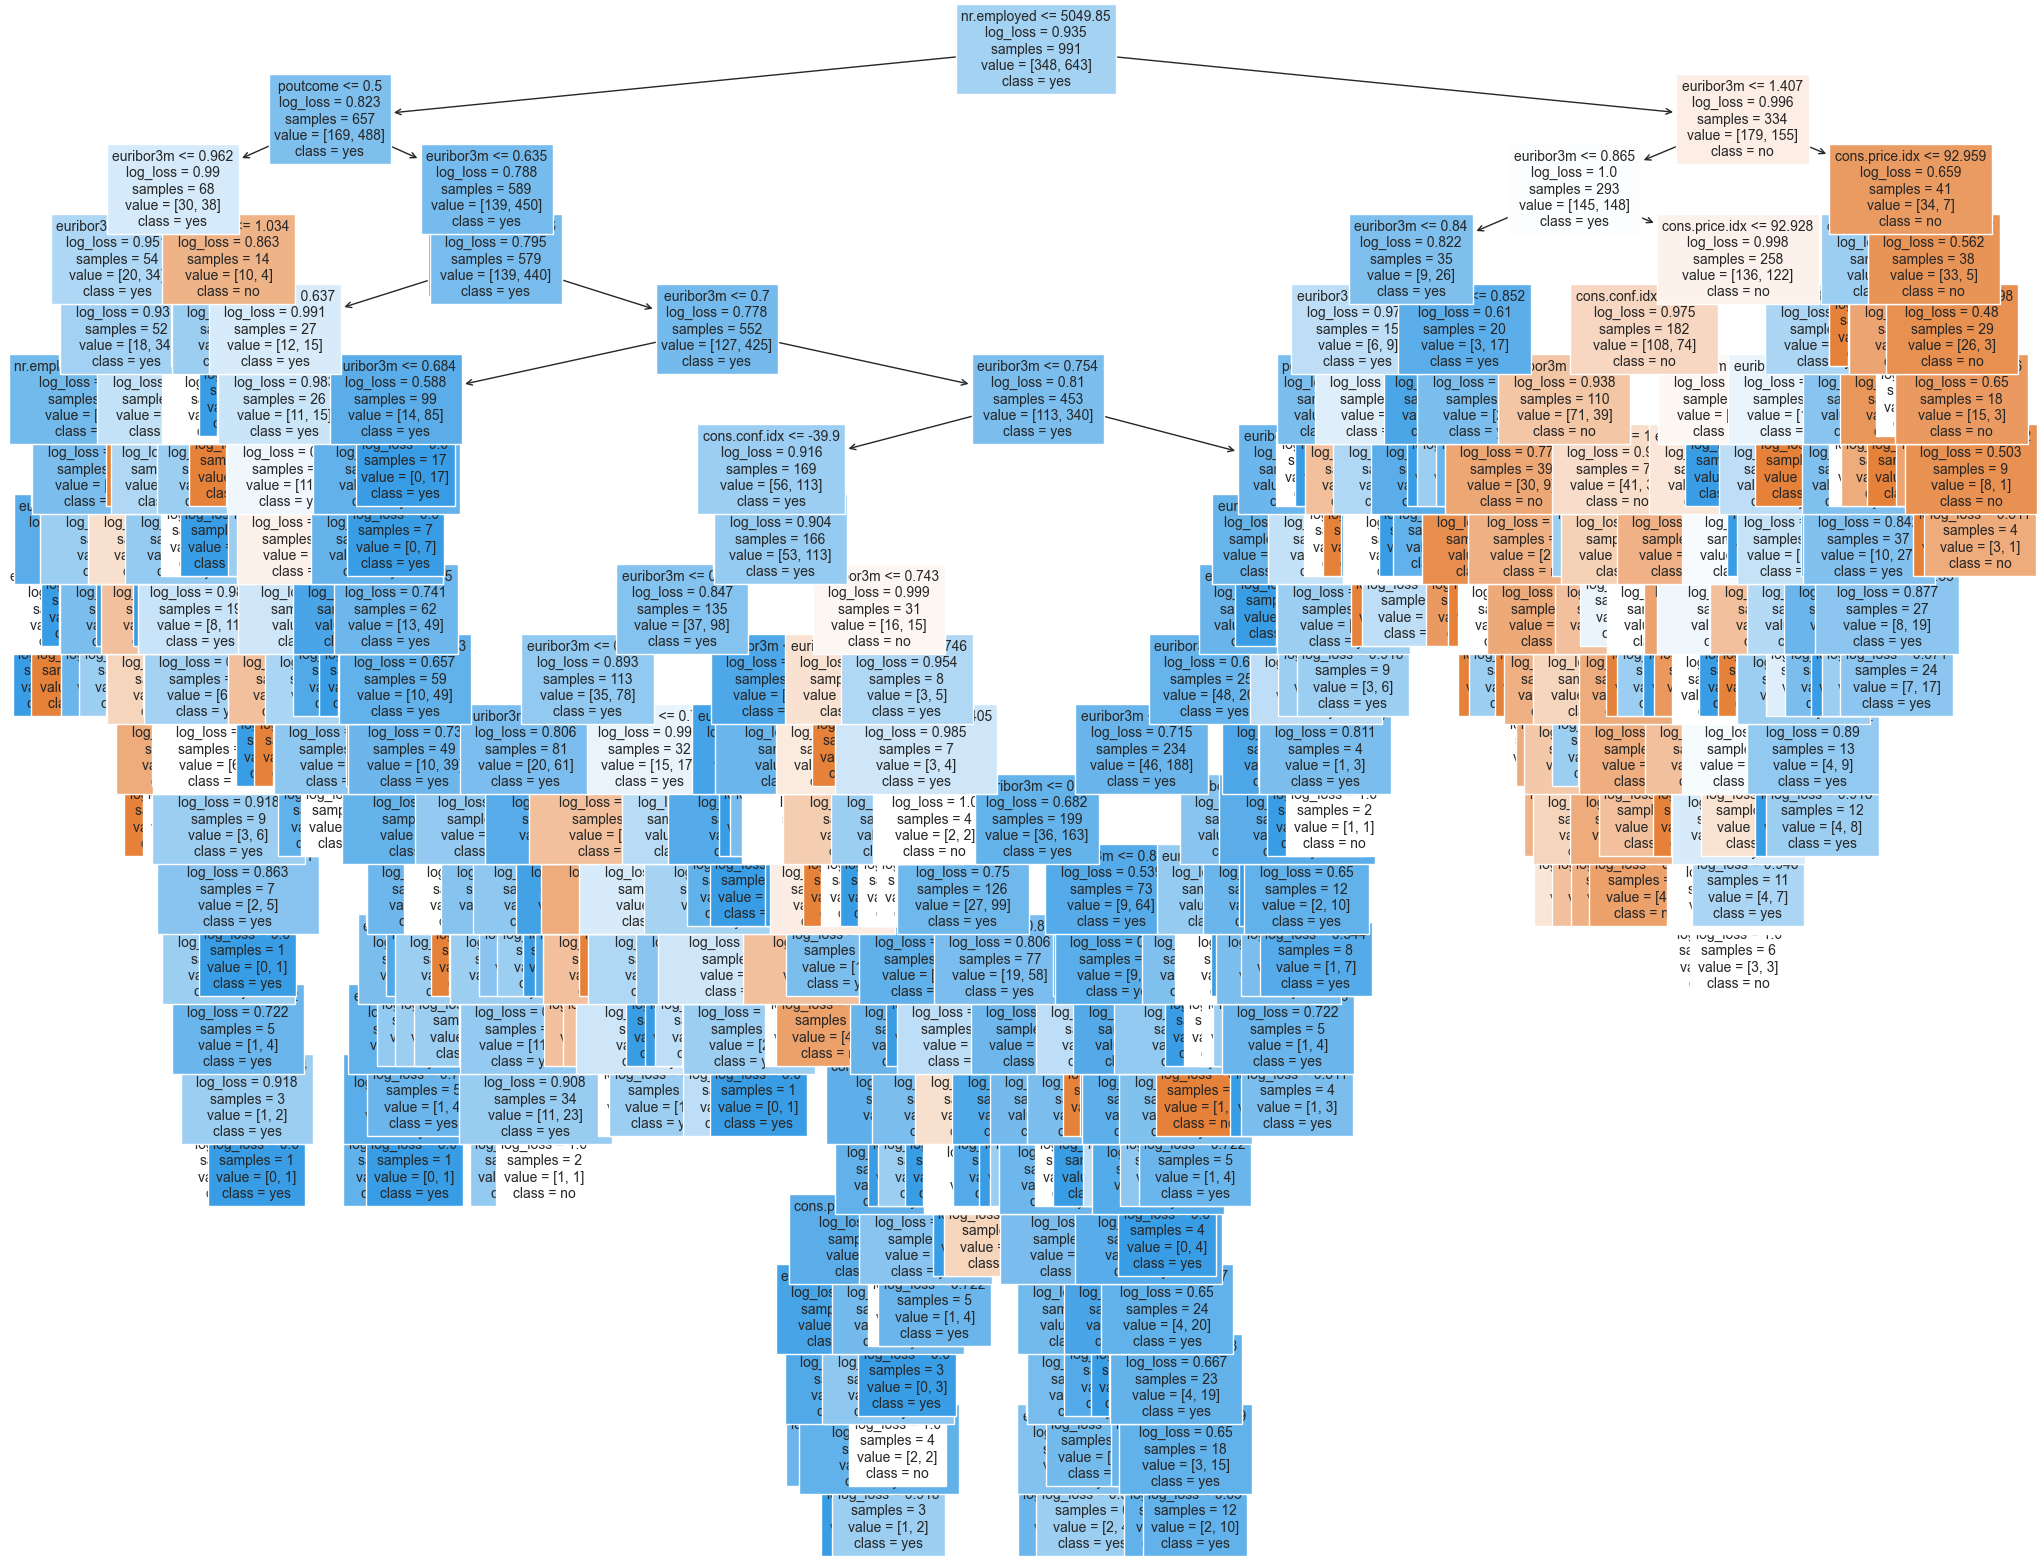

In [204]:
#create plot of decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,fontsize=10,feature_names=X_train.columns,class_names=['no','yes'],filled=True)
fig.savefig("decistion_tree.png")